**Name: Christ-Brian Amedjonekou**  
**Date: 04/16/2019**  
**PHYS 3600ID-D862 (Machine Learning) Study Hours Linear Regression**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**

### Abstract

Here, we use the Study Hours Dataset. It's a simple dataset which we'll use to illustrate the Linear Regression | Gradient Descent Models. The Study Hours Dataset contains one feature vector (amount of hours studied) and one target vector (scores on the exam), both of which are continuous, so Regression seems appropriate here. Since the dataset is simple we expect it to be clean, so no preprosessing is necessary. First, we'll create a Linear Regression Model from scratch, then we'll use both Tensorflow and Scikit-Learn implementations. Then, we'll evaluate the model's performance, find/tune the hyperparameters, and the provide visualizations of our results.

#### Contents:

1. [Data Exploration](#Data-Exploration)

### Packages   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
%matplotlib inline

### Data Exploration

* We import and label out dataset.

In [3]:
DSH_df = pd.read_csv('Datasets/data_students_hours.csv', names= ['Feature', 'Labels'])
features_DSH = np.array(DSH_df['Feature'])
labels_DSH = np.array(DSH_df['Labels'])

8 \. In the linear regression notebook, we went through an example and calculated the model coefficients of a linear regression model applied to these data. In the plot of the best fit line, what is the meaning of m and b?

* **'m' represents the slope of the best fit line, while 'b' is a representation of the intercept of the best fit line. These weights/parameters are approximated by the LinearRegression() model**

In [13]:
# 5-fold cross validation predictions
predict_Linear = cross_val_predict(linearModel, features_DSH.reshape(-1,1), labels_DSH, cv= 5)

$R^2$ scores: 0.5782980814154777


Text(0, 0.5, 'F(Features)')

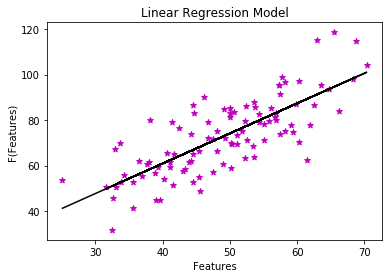

In [14]:
# plotting the points in a scatter plot
plt.scatter(features_DSH, labels_DSH,marker='*',color = 'm');

print('$R^2$ scores:',metrics.r2_score(labels_DSH, predict_Linear))

# fitting the model 
linearModel.fit(features_DSH.reshape(-1,1), labels_DSH)
plt.plot(features_DSH, linearModel.coef_* features_DSH + linearModel.intercept_, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('F(Features)')

9\. However these can also be calculated by hand using the formulas on the linear regression slides. Code up the formulas below and report your coefficients for slope and intercept.

$$S S_{xy} = \sum x_i y_i - \frac{(\sum x_i \sum y_i)}{n}$$

$$S S_{xx} = \sum x_i^2 - \frac{(\sum x_i)^2}{n}$$

$$m = \frac{S S_{xy}}{S S_{xx}}$$

$$b = \bar{y} - m * \bar{x}$$

$$\text{where } n = \text{ number of points and the overhead bar represent the mean.}$$



In [15]:
def ssXY(x, y):
    """Calculates the Sum of Squares for 'x' and 'y'."""
    n = y.size
    return sum(x*y) - ((sum(x)*sum(y))/n)

    
def ssXX(x):
    """Calculates the Sum of Squares for 'x'."""
    n = x.size
    return sum(x*x) - ((sum(x)*sum(x))/n)

In [16]:
slope = ssXY(features_DSH, labels_DSH)/ssXX(features_DSH)
intercept = labels_DSH.mean() - slope * features_DSH.mean()

In [17]:
print('The slope is: {1} and the intercept is: {0}'.format(intercept, slope))

The slope is: 1.3224310227553753 and the intercept is: 7.991020982269632


$R^2$ scores: 0.5782980814154777


Text(0, 0.5, 'F(Features)')

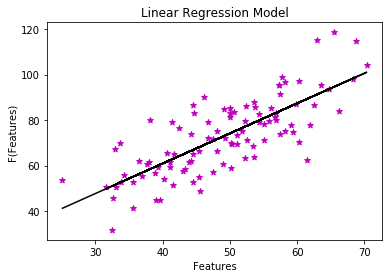

In [18]:
# plotting the points in a scatter plot
plt.scatter(features_DSH, labels_DSH,marker='*',color = 'm');

print('$R^2$ scores:',metrics.r2_score(labels_DSH, predict_Linear))

# fitting the model 
plt.plot(features_DSH, slope* features_DSH + intercept, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('F(Features)')

10\. Looking at the data (hours vs scores), do you think it would make sense to fit these data using a logistic regression model? Why or why not?

* **Based on the label data below, Logistic Regression would not be ideal at all. Tt would not make sense to fit this data using a logistic regression model. The reason is because we don't have or expect categorical predictions. Specically, I mean that the target vector ```labels_DSH ``` isn't categorical (n true/false, yes/no, up/down, etc). Check ```labels_DSH[:20] ```**

In [19]:
labels_DSH[:20]

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

Extra credit: Run the gradient descent notebook and report the coefficients you found here. Calculate the cost function (found in the linear regression notebook) for the slope, intercept values you found with the gradient descent method and the values you found above, using the formulas. Which set of values is best? 